<a href="https://colab.research.google.com/github/jaehyun0220/DL/blob/master/Git_Temp_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [253]:
# !pip install scikit-learn --upgrade

In [254]:
# 데이터 활용에 필요한 기본 패키지 로딩
import sys #access to system parameters 
print("Python version: {}". format(sys.version))

import pandas as pd
print("pandas version: {}". format(pd.__version__))

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

import os

Python version: 3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]
pandas version: 1.1.5
scikit-learn version: 0.24.2
NumPy version: 1.19.5
tensorflow version: 2.4.1


In [255]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from scipy import stats

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score
from sklearn import model_selection

# height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168, 198, 170, 170, 198, 170, 165, 193, 142, 137, 155, 165, 147, 170, 140, 165, 132, 137, 165, 165, 180, 168, 142, 193, 165, 142, 165, 137, 165, 160, 160, 165, 165, 165, 163, 170, 165, 155, 165, 165, 160, 163, 135, 165, 142, 193, 171, 162, 198, 190, 163, 150, 168, 168, 193, 170]
# weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69, 98, 77, 70, 90, 71, 70, 73, 59, 68, 86, 84, 67, 70, 86, 70, 75, 70, 68, 68, 77, 64, 86, 70, 82, 88, 98, 86, 63, 68, 66, 73, 66, 70, 74, 69, 70, 64, 66, 68, 64, 77, 70, 62, 79, 68, 56, 79, 82, 80, 77, 73, 82, 61, 80, 73]

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

# DataFrame 만들기

body = pd.DataFrame(
    {'height': height, 'weight': weight}
)

In [256]:
body.info

<bound method DataFrame.info of     height  weight
0      170      70
1      168      66
2      177      73
3      181      77
4      172      74
5      171      73
6      169      69
7      175      79
8      174      77
9      178      80
10     170      74
11     167      68
12     177      71
13     182      76
14     173      78
15     171      72
16     170      68
17     179      79
18     175      77
19     177      81
20     186      84
21     166      73
22     183      78
23     168      69>

In [257]:
body_shuffled=body.sample(frac=1, random_state = 42).reset_index(drop=True)
body_shuffled
body_shuffled.shape

(24, 2)

In [258]:
split_point = round(body_shuffled.shape[0]*0.7)
split_point

17

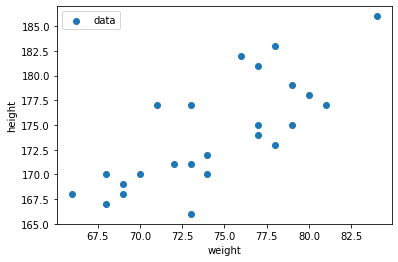

In [259]:
# 산점도(scatter) 그리기

import matplotlib.pylab as plt

plt.scatter( body_shuffled['weight'], body_shuffled['height'], label = "data")

plt.legend(loc = "best")
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

In [260]:
# Train & Test set 분리
train_x = body_shuffled['height'][:split_point]
test_x = body_shuffled['height'][split_point:]
train_y = body_shuffled['weight'][:split_point]
test_y = body_shuffled['weight'][split_point:]

train_x = train_x.values.reshape(-1,1)
test_x = test_x.values.reshape(-1,1)

all_x = np.vstack((train_x, test_x))

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression()

In [261]:
def regr_model_summary(regr, data_x, real_y):
  # Make predictions using the testing set
  pred_y = regr.predict(data_x)

  # The coefficientsbb
  print('Coefficients: ', regr.coef_, "\t Intercept: ", regr.intercept_)
  # The mean squared error
  # print('Mean Squared Log Error: %.2f'% mean_squared_log_error(test_y, pred_y))
  print('Mean Absolute Percentage Error: %.2f'% mean_absolute_percentage_error(real_y, pred_y))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'% r2_score(real_y, pred_y))

  params = np.append(regr.intercept_,regr.coef_)
  print("params =", params)


  new_x = np.append(np.ones((len(data_x),1)), data_x, axis=1)
  # print("test_x sample : ", data_x[:5])
  # print("new_x sample : ", new_x[:5])

  print("test_x shape is ", data_x.shape, "new_x shape is ", new_x.shape)
  MSE = (sum((real_y-pred_y)**2))/(len(new_x)-len(test_x[0])) # divides by the number of samples n-p where p is the number of features

  # print("len(new_x) : ", len(new_x), "len(test_x[0]): ", len(data_x[0]))

  # Note if you don't want to use a DataFrame replace the two lines above with
  # newX = np.append(np.ones((len(X),1)), X, axis=1)
  # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

  var_b = MSE*(np.linalg.inv(np.dot(new_x.T,new_x)).diagonal()) # calculate variance
  sd_b = np.sqrt(var_b) # calculate standard deviation
  ts_b = params/ sd_b # calcluate t-value

  print("variance : ", var_b, "standard deviation ", sd_b, "t_value: ", ts_b)

  # print("new_x : ", new_x, "new_x[0]: ", new_x[0], "new_x.shape: ", new_x.shape)


  # p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(new_x[0])))) for i in ts_b]
  p_values =[2*(1-stats.t.cdf(np.abs(i),(len(new_x)-len(data_x[0])))) for i in ts_b]

  sd_b = np.round(sd_b,3)
  ts_b = np.round(ts_b,3)
  p_values = np.round(p_values,10)
  params = np.round(params,4)

  myDF3 = pd.DataFrame()
  myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p_values"] = [params,sd_b,ts_b,p_values]
  # to print summary table:
  print("\n=========== SUMMARY ===========")
  print(myDF3)

  return pred_y

In [262]:
def print_plot_result(data_x, data_y, pred_y):
  print('Mean Absolute Percentage Error: %.2f'% mean_absolute_percentage_error(data_y, pred_y))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination: %.2f'% r2_score(data_y, pred_y))

  # Plot outputs
  plt.scatter(data_x, data_y,  color='black')
  plt.plot(data_x, pred_y, color='blue', linewidth=3)

  plt.xticks(())
  plt.yticks(())

  plt.show()

Coefficients:  [0.57190722] 	 Intercept:  -25.965721649484564
Mean Absolute Percentage Error: 0.03
Coefficient of determination: 0.55
params = [-25.96572165   0.57190722]
test_x shape is  (17, 1) new_x shape is  (17, 2)
variance :  [5.17943000e+02 1.70576335e-02] standard deviation  [22.7583611   0.13060488] t_value:  [-1.14093109  4.3789117 ]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values  p_values
0      -25.9657           22.758    -1.141  0.270689
1        0.5719            0.131     4.379  0.000467
Mean Absolute Percentage Error: 0.03
Coefficient of determination: 0.55


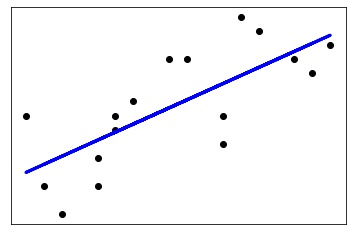

In [263]:
# Train Set에서의 모델링 결과 검증
train_pred_y = regr_model_summary(regr, train_x, train_y)
print_plot_result(train_x, train_y, train_pred_y)

Coefficients:  [0.57190722] 	 Intercept:  -25.965721649484564
Mean Absolute Percentage Error: 0.05
Coefficient of determination: 0.48
params = [-25.96572165   0.57190722]
test_x shape is  (7, 1) new_x shape is  (7, 2)
variance :  [2.31926547e+03 7.65203253e-02] standard deviation  [48.1587528   0.27662307] t_value:  [-0.53916931  2.06746027]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values  p_values
0      -25.9657           48.159    -0.539  0.609179
1        0.5719            0.277     2.067  0.084183
Mean Absolute Percentage Error: 0.05
Coefficient of determination: 0.48


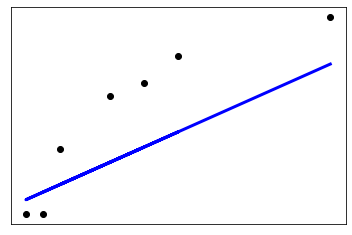

In [264]:
# Test Set을 통한 모델링 결과 검증
test_pred_y = regr_model_summary(regr, test_x, test_y)
print_plot_result(test_x, test_y, test_pred_y)

In [265]:
# body dataset을 scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(all_x)
body_standardScaled_x = standardScaler.transform(all_x)
print(standardScaler.scale_, standardScaler.mean_, standardScaler.var_, standardScaler.n_features_in_, standardScaler.n_samples_seen_)

[5.35655751] [174.125] [28.69270833] 1 24


In [266]:
all_x[0], body_standardScaled_x[0], train_y[0]

(array([174]), array([-0.02333588]), 77)

In [267]:
# z = (x - u) / s
# x = (z * s) + u
# -0.02333588  = (x - standardScaler.mean_)/ standardScaler.scale_

(body_standardScaled_x[0]*standardScaler.scale_)+standardScaler.mean_ 

array([174.])

In [268]:
5.35655751*5.35655751

28.692708357937402

In [269]:
body_standardScaled_x[:,0][split_point:]

array([ 2.2169089 , -1.14345827,  0.16335118, -0.77008414, -0.21002295,
        0.53672531, -0.95677121])

In [270]:
# Train & Test set 분리
train_x = body_standardScaled_x[:,0][:split_point]
test_x = body_standardScaled_x[:,0][split_point:]
train_y = body_shuffled['weight'][:split_point]
test_y = body_shuffled['weight'][split_point:]

train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_x, train_y)

LinearRegression()

Coefficients:  [3.06345389] 	 Intercept:  73.61762242268041
Mean Absolute Percentage Error: 0.03
Coefficient of determination: 0.55
params = [73.61762242  3.06345389]
test_x shape is  (17, 1) new_x shape is  (17, 2)
variance :  [0.45806331 0.4894297 ] standard deviation  [0.67680374 0.69959253] t_value:  [108.77248122   4.3789117 ]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values  p_values
0       73.6176            0.677   108.772  0.000000
1        3.0635            0.700     4.379  0.000467
Mean Absolute Percentage Error: 0.03
Coefficient of determination: 0.55


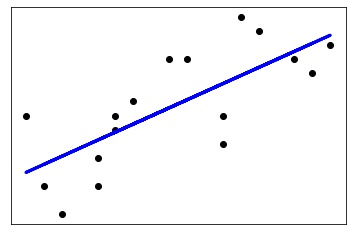

In [271]:
# Train Set에서의 모델링 결과 검증
train_pred_y = regr_model_summary(regr, train_x, train_y)
print_plot_result(train_x, train_y, train_pred_y)

Coefficients:  [3.06345389] 	 Intercept:  73.61762242268041
Mean Absolute Percentage Error: 0.05
Coefficient of determination: 0.48
params = [73.61762242  3.06345389]
test_x shape is  (7, 1) new_x shape is  (7, 2)
variance :  [2.53729784 2.19557538] standard deviation  [1.59288978 1.48174741] t_value:  [46.21639457  2.06746027]

=========== SUMMARY ===========
   Coefficients  Standard Errors  t values      p_values
0       73.6176            1.593    46.216  6.900000e-09
1        3.0635            1.482     2.067  8.418278e-02
Mean Absolute Percentage Error: 0.05
Coefficient of determination: 0.48


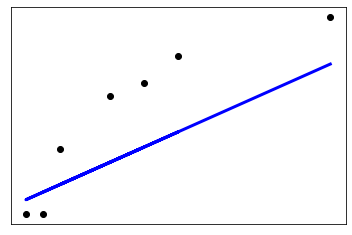

In [272]:
# Test Set을 통한 모델링 결과 검증
test_pred_y = regr_model_summary(regr, test_x, test_y)
print_plot_result(test_x, test_y, test_pred_y)